# **Graph Colouring Assignment**

Graph Coloring Problem (GCP):
Can we assign exactly one color (from a limited set of k colors) to each node such that no two connected nodes share the same colour?

## **1. Working with Graphs**

The graphs mentioned in this assignment are undirected/symmetric: that is, if a has an edge to b, then b has an edge to a.

First we must define our graph. We can do so by defining the nodes and edges as follows:

In [1]:
# Sample 3-colorable cycle graph
nodes = 5  # Number of nodes
edges = [(1, 2), (1, 3), (2, 4), (3, 5), (4, 5)]  # List of edges

We can also visualize this graph. You can re-use this code to plot graphs later on in the assignment.

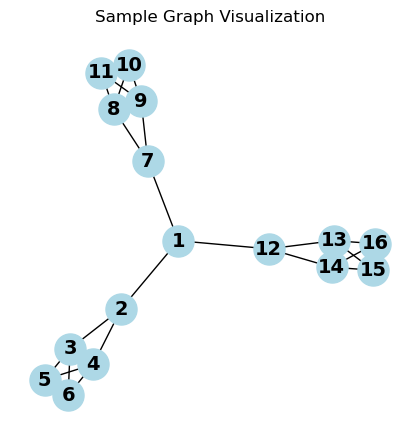

In [9]:
# import necessary modules
import networkx as nx
import matplotlib.pyplot as plt

def plot_graph(edges):
    # Create a graph object
    G = nx.Graph()
    
    # Add edges to the graph
    G.add_edges_from(edges)
    
    # Draw the graph
    pos = nx.spring_layout(G)  # Layout for visual spacing
    plt.figure(figsize=(4, 4))
    
    # Draw nodes and edges with labels
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=500, edge_color='black', font_size=14, font_weight='bold')
    
    # Display the plot
    plt.title("Sample Graph Visualization")
    plt.show()

# Call plot_graph function
plot_graph(edges)

### **Task 1. Design your Graph**

<span style="color:blue">TO DO: </span> design your graph and visualize it with help of the plot_graph function above.

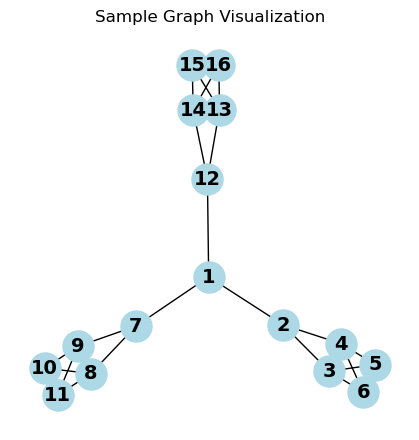

In [3]:

edges = [
    (1, 2), (2, 3), (2, 4), (3, 5), (3, 6), (5, 6), (4, 5), (4, 6),

    (1, 7), (7, 8), (7, 9), (8, 10), (8, 11), (10, 11), (9, 10), (9, 11),

    (1, 12), (12, 13), (12, 14), (13, 15), (13, 16), (15, 16), (14, 15), (14, 16)
]

plot_graph(edges)



## **2. Encoding the GCP as a SAT problem**

Now we need to encode our Graph Coloring Problem as a SAT problem. We do this by formulating a CNF (Conjunctive Normal Form) that is satisfiable if and only if our graph is k-colorable.

### **Task 2: Answer the following Question**

<span style="color:blue">ANSWER: </span> How many CNF variables and clauses should your CNF formula have in terms of the number of nodes |V| and the number of edges |E|? Explain you rationale.

HINT: The slide about CNF formulas might be helfpful. Sum the number of clauses that follow from each constraint.

With 16 nodes and 24 edges
Rationale:
  The number of CNF variables ∣V∣×k arises from the need to assig kk possible colors to each of the ∣V∣ node Since there are 16 nodes in my problem we need 16xk CNF variables.
s   The number of CNF clauses comes from the constrain
t1.     Ensuring each node has at least one c.oor (1 clause per  = 16
2.      Ensuring each node has at most one .c(lor (k/k)(k−1)​ clauses per = 8k(k-1) o3.       Ensuring adjacent nodes do not share the same. oor (kk clauses pe = 24k

Total CNF clauses = 16 +  8k(k-1) + 24ke colors.iable if and only if the graph can be colored with kk colors.

### **Task 3: Encode the Third Constraint**

<span style="color:blue">TO DO: </span> complete the following function by defining the third constraint.

HINT: loop over the edges first.

In [4]:
def graph_to_cnf(k, nodes, edges):
    """
    Generates a CNF formula for the k-coloring problem on graph G.
    Each variable var(v,c) represents that node v has color c.
    
    Parameters:
    k (int): The number of colors
    nodes(int): The number nodes of the graph
    edges(list): The number of edges of the graph

    Returns:
    clauses (list of list of int): The CNF clauses
    """
    
    clauses = []
    ## STEP 1: variable assignment

    # map each node v with color c to a unique variable (integer)
    def var(v, c):
        return (v - 1) * k + c
    
    ## STEP 2: constraints

    # Constraint 1 and 2: Each node must be assigned EXACTLY one color
    for v in range(1, nodes + 1):
        # each node has to have at least one color
        clauses.append([var(v, c) for c in range(1, k + 1)])
        # a node cannot have two colors at the same time
        for c1 in range(1, k + 1):
            for c2 in range(c1 + 1, k + 1):
                # for each combination of two colors, at most one of these can be true
                clauses.append([-var(v, c1), -var(v, c2)])

    # Constraint 3: No two connected nodes share the same color
    ### TO DO: define this constraint:

    ### SOLUTION ###
    for (v1, v2) in edges:
        for c in range(1, k + 1):
            # v1 and v2 cannot both be color `c`
            clauses.append([-var(v1, c), -var(v2, c)])
    ### END SOLUTION ###

    return clauses

You should now be able to run the function to create the correct CNF formula. 

You can convert it to DIMACS format (see slides) and save it to a file by running the following code:

In [5]:
# Run the function with k = 3 (for 3-colorability)
k = 3
clauses = graph_to_cnf(k, nodes, edges)

# Number of variables and clauses
num_variables = nodes * k
num_clauses = len(clauses)

# Writing the CNF file in DIMACS-like format
cnf_output = f"p cnf {num_variables} {num_clauses}\n"
for clause in clauses:
    cnf_output += " ".join(map(str, clause)) + " 0\n"

# Output the CNF formula
print(cnf_output)

# Save the CNF to a file:
with open("sample_graph_3color.cnf", 'w') as f:
    f.write(cnf_output)

p cnf 15 92
1 2 3 0
-1 -2 0
-1 -3 0
-2 -3 0
4 5 6 0
-4 -5 0
-4 -6 0
-5 -6 0
7 8 9 0
-7 -8 0
-7 -9 0
-8 -9 0
10 11 12 0
-10 -11 0
-10 -12 0
-11 -12 0
13 14 15 0
-13 -14 0
-13 -15 0
-14 -15 0
-1 -4 0
-2 -5 0
-3 -6 0
-4 -7 0
-5 -8 0
-6 -9 0
-4 -10 0
-5 -11 0
-6 -12 0
-7 -13 0
-8 -14 0
-9 -15 0
-7 -16 0
-8 -17 0
-9 -18 0
-13 -16 0
-14 -17 0
-15 -18 0
-10 -13 0
-11 -14 0
-12 -15 0
-10 -16 0
-11 -17 0
-12 -18 0
-1 -19 0
-2 -20 0
-3 -21 0
-19 -22 0
-20 -23 0
-21 -24 0
-19 -25 0
-20 -26 0
-21 -27 0
-22 -28 0
-23 -29 0
-24 -30 0
-22 -31 0
-23 -32 0
-24 -33 0
-28 -31 0
-29 -32 0
-30 -33 0
-25 -28 0
-26 -29 0
-27 -30 0
-25 -31 0
-26 -32 0
-27 -33 0
-1 -34 0
-2 -35 0
-3 -36 0
-34 -37 0
-35 -38 0
-36 -39 0
-34 -40 0
-35 -41 0
-36 -42 0
-37 -43 0
-38 -44 0
-39 -45 0
-37 -46 0
-38 -47 0
-39 -48 0
-43 -46 0
-44 -47 0
-45 -48 0
-40 -43 0
-41 -44 0
-42 -45 0
-40 -46 0
-41 -47 0
-42 -48 0



## **3. Solving the SAT problem**

Now that the SAT problem is defined we can use a modern SAT solver, such as minisat, to find a variable assignment (if one exists) that satisfies all clauses defined in the CNF. 

Minisat takes a .cnf file as input, and will output the results to a specified .txt file. You can do this in your terminal using:
```python
$minisat sample_graph_3color.cnf output.txt 
```
or simply by running the code block below.

In [14]:
import subprocess

result = subprocess.run(['minisat', "NL_graph_4color.cnf", 'sample_output.txt'], capture_output=True)
print(result.stdout.decode())

FileNotFoundError: [WinError 2] The system cannot find the file specified

You can translate the SAT output file into a list of node-color pairs if the graph is k-colorable. Each line contains two integers, the first one being the node number and the second one being the color number. If the graph is not k-colorable, the first line of the file should be -1. 

You can do this by running the block of code below. There is no need to understand these functions in depth, but don't forget to change k and the number of nodes according to your graph.

In [ ]:
def parse_sat_output(result_file, k, nodes):
    """
    Parses the output.txt file output from the SAT solver and extracts
    the variable assignments, then maps them to vertex-color pairs.
    """
    node_color_pairs = []

    with open(result_file, 'r') as f:
        lines = f.readlines()

    # If the first line is "UNSAT", return -1
    if lines[0].strip() == "UNSAT":
        return -1

    # SAT result: extract variable assignments
    assignments = list(map(int, lines[1].split()))

    # Loop over the assignments, find variables that are True (positive integers)
    for assignment in assignments:
        if assignment > 0:  # A positive value means the variable is True
            variable = assignment
            vertex = (variable - 1) // k + 1  # Find the vertex from variable
            color = (variable - 1) % k + 1    # Find the color from variable
            node_color_pairs.append((vertex, color))

    return node_color_pairs


def output(node_color_pairs):
    """
    Outputs the node-color pairs in the required format.
    """
    if node_color_pairs == -1:
        print("-1")
    else:
        for node, color in sorted(node_color_pairs):
            print(f"{node} {color}")

    # write results to a file:
    with open("sample_solutions.txt", 'w') as f:
        if node_color_pairs == -1:
            f.write("-1\n")
        else:
            for node, color in sorted(node_color_pairs):
                f.write(f"{node} {color}\n")

# After running the SAT solver, parse the result.txt file
result_file = "sample_output.txt"
node_color_pairs = parse_sat_output(result_file, k, nodes)

# Output the node-color assignments
output(node_color_pairs)

You can visualize your final solution by plotting the colored graph using the code block below:

In [7]:
def plot_colored_graph(edges):
    # Define the graph
    G = nx.Graph()
    G.add_edges_from(edges)

    # Define the node colors
    node_color_pairs = parse_sat_output(result_file, k, nodes)
    if node_color_pairs == -1:
        print("-1")
        return

    color_map = []
    
    for node, color in sorted(node_color_pairs):
        if color == 1:
            color_map.append('red')
        elif color == 2:
            color_map.append('blue')
        elif color == 3:
            color_map.append('green')
        else:
            color_map.append('magenta')  
    
    # Draw the graph
    pos = nx.spring_layout(G)
    plt.figure(figsize=(4, 4))
    
    # Draw nodes and edges with labels
    nx.draw(G, pos, with_labels=True, node_color=color_map, node_size=500, edge_color='black', font_size=14, font_weight='bold')
    
    # Display the plot
    plt.title("Sample Graph Visualization")
    plt.show()

# Call plot_graph function
plot_colored_graph(edges)

NameError: name 'parse_sat_output' is not defined

### **Task 4: Answer the following Questions**

<span style="color:blue">ANSWER: </span> Is your graph 3-colorable? If so, use the code above to plot your solution. Is your solution unique?

<span style="color:blue">ANSWER: </span> Is your graph 2-colorable?

## **4. Face Coloring with k=4** 

Now that you know the steps, you can generalize this method to k-colorable graphs, where k>3. 

### **Task 5: Show the map of the Netherlands is 4-colorable**

<span style="color:blue">TO DO: </span> Use the vertex-coloring steps outlined above to show you can color the provinces of the Netherlands with only 4 colors.

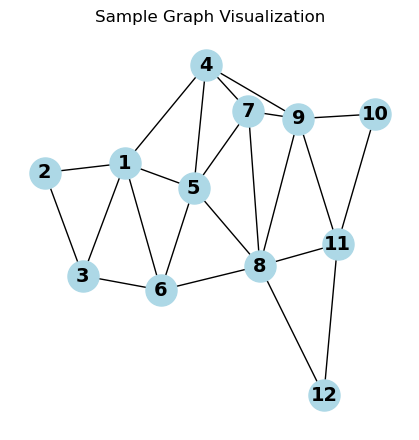

FileNotFoundError: [WinError 2] The system cannot find the file specified

In [8]:
### SOLUTION ###

nodes = 12
edges = [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), 
         (2, 3), (3, 6), (4, 5), (4, 7), (4, 9), 
         (5, 6), (5, 7), (5, 8), (6, 8), (7, 8),
         (7, 9), (8, 9), (8, 11), (8, 12), (9, 10), 
         (9,11), (10, 11), (11, 12)]

plot_graph(edges)

# Run the function with k = 3 (for 3-colorability)
k = 4
clauses = graph_to_cnf(k, nodes, edges)

# Number of variables and clauses
num_variables = nodes * k
num_clauses = len(clauses)

# write the CNF file in DIMACS-like format
cnf_output = f"p cnf {num_variables} {num_clauses}\n"
for clause in clauses:
    cnf_output += " ".join(map(str, clause)) + " 0\n"

# Save the CNF to a file:
with open("NL_graph_4color.cnf", 'w') as f:
    f.write(cnf_output)

# run the SAT solver
result = subprocess.run(['minisat', "NL_graph_4color.cnf", 'NL_output.txt'], capture_output=True)
print(result.stdout.decode())

# After running the SAT solver, parse the result.txt file
result_file = "NL_output.txt"
node_color_pairs = parse_sat_output(result_file, k, nodes)

# (optional) Output the node-color assignments
#output(node_color_pairs)

# plot the final graph
plot_colored_graph(edges)

### END SOLUTION ###

